# EDA Analisis

## Import Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np


## Input cleaned Csvs.

In [2]:
coin_id_df = pd.read_csv('../Csvs_cleanned/coin_id.csv')
coins_global_trends_df = pd.read_csv('../Csvs_cleanned/coins_global_trends.csv')
# normalized_tickers_resume_df = pd.read_csv('../Csvs_cleanned/normalized_tickers_resume.csv')
ohlc_prices_df = pd.read_csv('../Csvs_cleanned/ohlc_prices.csv')
prices_df = pd.read_csv('../Csvs_cleanned/prices.csv')
# prices_normalized_df = pd.read_csv('../Csvs_cleanned/prices_normalized.csv')
ranking_coingecko_df = pd.read_csv('../Csvs_cleanned/ranking_coingecko.csv')
tickers_resume_df = pd.read_csv('../Csvs_cleanned/tickers_resume.csv')
top_criptos_df = pd.read_csv('../Csvs_cleanned/top_criptos.csv')

### coin_id_df:

In [3]:
coin_id_df.head(15)

,crip_id,symbol,name
0,akash-network,akt,akash network
1,binancecoin,bnb,bnb
2,binance-coin-wormhole,bnb,binance coin (wormhole)
3,binance-peg-cardano,ada,binance-peg cardano
4,binance-peg-dogecoin,doge,binance-peg dogecoin
5,binance-peg-xrp,xrp,binance-peg xrp
6,bitcoin,btc,bitcoin
7,bitrock,brock,bitrock
8,bone-2,bone,bone
9,bone-shibaswap,bone,bone shibaswap


### coins_global_trends_df:

In [4]:
coins_global_trends_df.head(15)

,crip_id,coin_id,name,symbol,market_cap_rank,thumb,small,large,slug,price_btc,score
0,sei-network,28205,sei,sei,122,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,sei,0.000006,0
1,akash-network,12785,akash network,akt,108,https://assets.coingecko.com/coins/images/1278...,https://assets.coingecko.com/coins/images/1278...,https://assets.coingecko.com/coins/images/1278...,akash-network,0.000056,1
2,solana,4128,solana,sol,10,https://assets.coingecko.com/coins/images/4128...,https://assets.coingecko.com/coins/images/4128...,https://assets.coingecko.com/coins/images/4128...,solana,0.000805,2
3,bone-shibaswap,16916,bone shibaswap,bone,109,https://assets.coingecko.com/coins/images/1691...,https://assets.coingecko.com/coins/images/1691...,https://assets.coingecko.com/coins/images/1691...,bone-shibaswap,0.000053,3
4,bitrock,30987,bitrock,brock,882,https://assets.coingecko.com/coins/images/3098...,https://assets.coingecko.com/coins/images/3098...,https://assets.coingecko.com/coins/images/3098...,bitrock,0.000004,4
5,tezos,976,tezos,xtz,58,https://assets.coingecko.com/coins/images/976/...,https://assets.coingecko.com/coins/images/976/...,https://assets.coingecko.com/coins/images/976/...,tezos,0.000027,5
6,sui,26375,sui,sui,90,https://assets.coingecko.com/coins/images/2637...,https://assets.coingecko.com/coins/images/2637...,https://assets.coingecko.com/coins/images/2637...,sui,0.000022,6
7,worldcoin-wld,31069,worldcoin,wld,169,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,worldcoin,0.000054,7


In [5]:
coins_global_trends_df = coins_global_trends_df[['crip_id','name','market_cap_rank','price_btc','score']]

In [6]:
# Ordenar el DataFrame por la columna 'score' de manera descendente
sorted_coins_global_trends_df = coins_global_trends_df.sort_values(by='score', ascending=True)


In [7]:
sorted_coins_global_trends_df.head()

,crip_id,name,market_cap_rank,price_btc,score
0,sei-network,sei,122,0.000006,0
1,akash-network,akash network,108,0.000056,1
2,solana,solana,10,0.000805,2
3,bone-shibaswap,bone shibaswap,109,0.000053,3
4,bitrock,bitrock,882,0.000004,4


### ohlc_prices_df:

Debe conbinarce con price

In [8]:
ohlc_prices_df.head(15)

,timestamp,open_price,high_price,low_price,close_price,crip_id
0,2023-08-03 12:00:00,0.00040,0.00040,0.00040,0.00040,warioxrpdumbledoreyugioh69inu
1,2023-08-03 16:00:00,0.00038,0.00042,0.00033,0.00042,warioxrpdumbledoreyugioh69inu
2,2023-08-03 20:00:00,0.00043,0.00044,0.00025,0.00031,warioxrpdumbledoreyugioh69inu
3,2023-08-04 00:00:00,0.00028,0.00031,0.00028,0.00030,warioxrpdumbledoreyugioh69inu
4,2023-08-04 04:00:00,0.00030,0.00030,0.00028,0.00030,warioxrpdumbledoreyugioh69inu
5,2023-08-04 08:00:00,0.00029,0.00029,0.00028,0.00028,warioxrpdumbledoreyugioh69inu
6,2023-08-04 12:00:00,0.00028,0.00029,0.00028,0.00029,warioxrpdumbledoreyugioh69inu
7,2023-08-04 16:00:00,0.00028,0.00028,0.00027,0.00028,warioxrpdumbledoreyugioh69inu
8,2023-08-04 20:00:00,0.00028,0.00037,0.00028,0.00031,warioxrpdumbledoreyugioh69inu
9,2023-08-05 00:00:00,0.00031,0.00032,0.00031,0.00031,warioxrpdumbledoreyugioh69inu


In [9]:
ohlc_prices_df.shape

(7088, 6)

In [10]:
ohlc_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7088 entries, 0 to 7087
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    7088 non-null   object 
 1   open_price   7088 non-null   float64
 2   high_price   7088 non-null   float64
 3   low_price    7088 non-null   float64
 4   close_price  7088 non-null   float64
 5   crip_id      7088 non-null   object 
dtypes: float64(4), object(2)
memory usage: 332.4+ KB


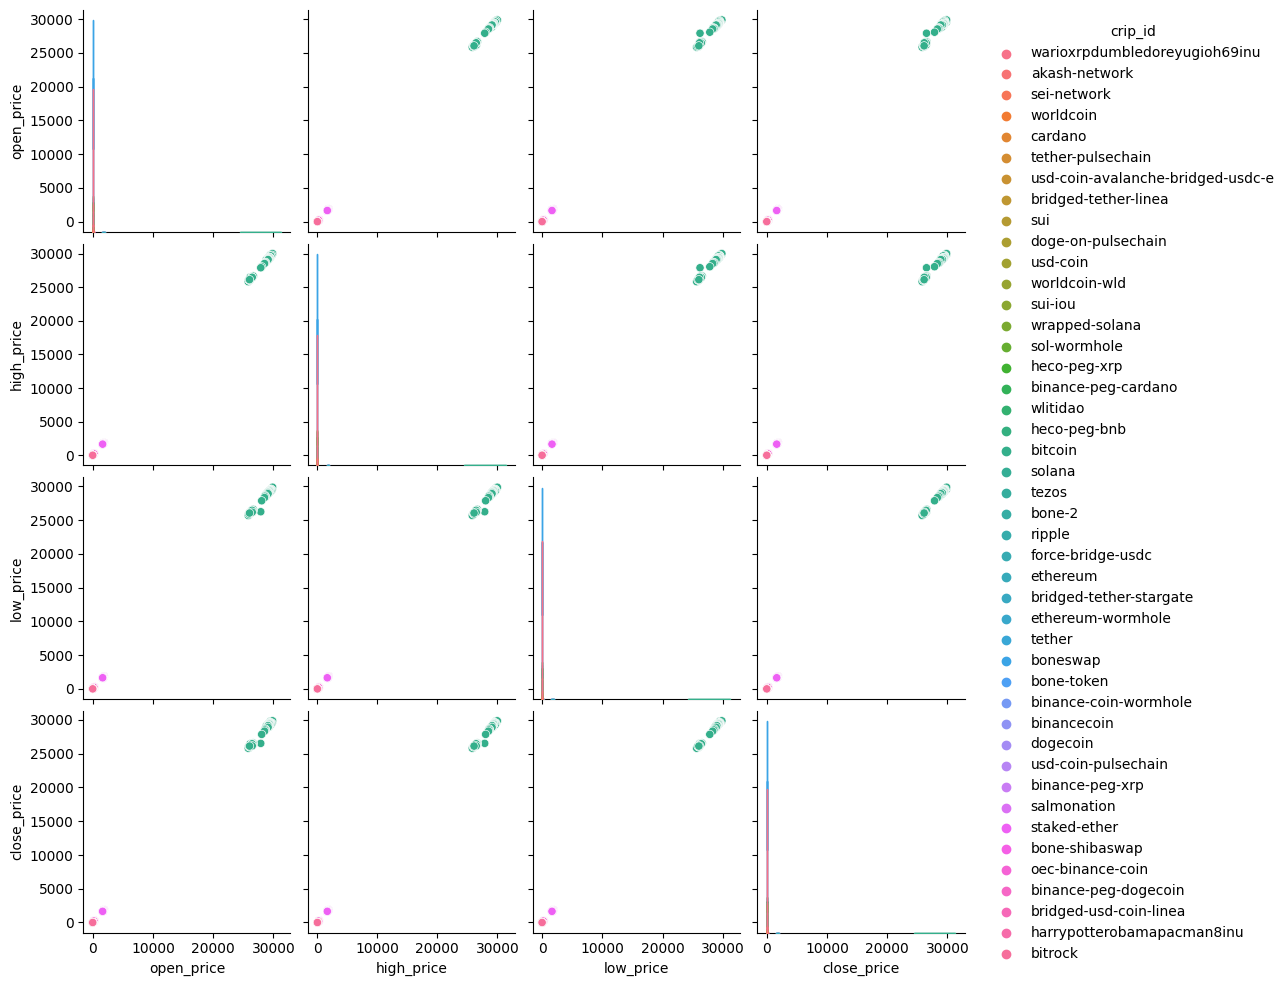

In [11]:
sns.pairplot(ohlc_prices_df, hue='crip_id')

In [12]:
# Convertir la columna 'timestamp' a tipo datetime
ohlc_prices_df['timestamp'] = pd.to_datetime(ohlc_prices_df['timestamp'])

# Ordenar el DataFrame por 'crip_id' y 'timestamp'
ohlc_prices_df = ohlc_prices_df.sort_values(by=['crip_id', 'timestamp'])

# Calcular los incrementos respecto al valor anterior para las columnas de precio
price_columns = ['open_price', 'high_price', 'low_price', 'close_price']
for column in price_columns:
    ohlc_prices_df[f'{column}_increment'] = ohlc_prices_df.groupby('crip_id')[column].diff()

In [13]:
ohlc_prices_df.head(5)

,timestamp,open_price,high_price,low_price,close_price,crip_id,open_price_increment,high_price_increment,low_price_increment,close_price_increment
114,2023-07-25 20:00:00,0.58856,0.58980,0.58856,0.58980,akash-network,NaN,NaN,NaN,NaN
115,2023-07-26 00:00:00,0.59295,0.59366,0.59271,0.59320,akash-network,0.00439,0.00386,0.00415,0.00340
116,2023-07-26 04:00:00,0.59366,0.59576,0.59050,0.59050,akash-network,0.00071,0.00210,-0.00221,-0.00270
117,2023-07-26 08:00:00,0.59273,0.60090,0.59273,0.60090,akash-network,-0.00093,0.00514,0.00223,0.01040
118,2023-07-26 12:00:00,0.59973,0.59973,0.59708,0.59725,akash-network,0.00700,-0.00117,0.00435,-0.00365


In [14]:
ohlc_prices_df = ohlc_prices_df.fillna(0)

In [15]:
ohlc_prices_df.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/ohlc_prices_df_increments.csv', mode='w', index=False)

In [16]:
ohlc_prices_df.head(5)

,timestamp,open_price,high_price,low_price,close_price,crip_id,open_price_increment,high_price_increment,low_price_increment,close_price_increment
114,2023-07-25 20:00:00,0.58856,0.58980,0.58856,0.58980,akash-network,0.00000,0.00000,0.00000,0.00000
115,2023-07-26 00:00:00,0.59295,0.59366,0.59271,0.59320,akash-network,0.00439,0.00386,0.00415,0.00340
116,2023-07-26 04:00:00,0.59366,0.59576,0.59050,0.59050,akash-network,0.00071,0.00210,-0.00221,-0.00270
117,2023-07-26 08:00:00,0.59273,0.60090,0.59273,0.60090,akash-network,-0.00093,0.00514,0.00223,0.01040
118,2023-07-26 12:00:00,0.59973,0.59973,0.59708,0.59725,akash-network,0.00700,-0.00117,0.00435,-0.00365


### prices_df:

In [17]:
prices_df.head(15)

,crip_id,timestamp,price,market_cap,total_volume
0,warioxrpdumbledoreyugioh69inu,2023-08-03 00:00:00,0.00030,0.0,258201.3000
1,warioxrpdumbledoreyugioh69inu,2023-08-04 00:00:00,0.00030,0.0,258201.3000
2,warioxrpdumbledoreyugioh69inu,2023-08-05 00:00:00,0.00030,0.0,44605.9260
3,warioxrpdumbledoreyugioh69inu,2023-08-06 00:00:00,0.00022,0.0,72739.7900
4,warioxrpdumbledoreyugioh69inu,2023-08-07 00:00:00,0.00023,0.0,60343.8050
5,warioxrpdumbledoreyugioh69inu,2023-08-08 00:00:00,0.00017,0.0,74380.8500
6,warioxrpdumbledoreyugioh69inu,2023-08-09 00:00:00,0.00018,0.0,17632.0180
7,warioxrpdumbledoreyugioh69inu,2023-08-10 00:00:00,0.00013,0.0,30274.0160
8,warioxrpdumbledoreyugioh69inu,2023-08-11 00:00:00,0.00014,0.0,32638.7340
9,warioxrpdumbledoreyugioh69inu,2023-08-12 00:00:00,0.00009,0.0,24753.6210


In [18]:
prices_df.shape

(5715, 5)

In [19]:
# Convertir la columna 'timestamp' a tipo datetime
prices_df['timestamp'] = pd.to_datetime(prices_df['timestamp'])

# Ordenar el DataFrame por 'crip_id' y 'timestamp'
prices_df = prices_df.sort_values(by=['crip_id', 'timestamp'])

# Calcular los incrementos respecto al valor anterior para la columna 'price'
prices_df['price_increment'] = prices_df.groupby('crip_id')['price'].diff()

In [20]:
prices_df = prices_df.fillna(0)

In [21]:
prices_df.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/prices_df_increments.csv', mode='w',index=False)

In [22]:

prices_df.head(167)

,crip_id,timestamp,price,market_cap,total_volume,price_increment
22,akash-network,2023-03-15 00:00:00,0.35384,71184600.0,1.493419e+06,0.00000
23,akash-network,2023-03-16 00:00:00,0.33292,66963104.0,1.525970e+06,-0.02092
24,akash-network,2023-03-17 00:00:00,0.33480,67376620.0,1.290421e+06,0.00188
25,akash-network,2023-03-18 00:00:00,0.34765,69827780.0,1.350676e+06,0.01285
26,akash-network,2023-03-19 00:00:00,0.34163,68762080.0,1.398586e+06,-0.00602
...,...,...,...,...,...,...
184,akash-network,2023-08-24 00:00:00,1.53132,331225470.0,5.504659e+06,0.05473
185,akash-network,2023-08-24 17:18:08,1.46109,318134050.0,5.301414e+06,-0.07023
4081,binance-coin-wormhole,2023-03-15 00:00:00,312.71190,0.0,1.004407e+03,0.00000
4082,binance-coin-wormhole,2023-03-16 00:00:00,307.90518,0.0,1.531907e+03,-4.80672


In [23]:
# sns.pairplot(prices_df, hue='crip_id')

### Merged Ohlc_prices_df y Prices_df:

##### Merge

In [24]:
# Realizar el merge utilizando 'crip_id' y 'date'
merged_df_ohlc_prices_df_and_prices_df = pd.merge(ohlc_prices_df, prices_df, on=['crip_id', 'timestamp'])

In [25]:
merged_df_ohlc_prices_df_and_prices_df.head(10)

,timestamp,open_price,high_price,low_price,close_price,crip_id,open_price_increment,high_price_increment,low_price_increment,close_price_increment,price,market_cap,total_volume,price_increment
0,2023-07-26,0.59295,0.59366,0.59271,0.59320,akash-network,0.00439,0.00386,0.00415,0.00340,0.59366,128287320.0,1247840.9,0.01151
1,2023-07-27,0.58747,0.58854,0.58729,0.58801,akash-network,-0.00856,-0.00763,-0.00362,-0.00290,0.59038,127458380.0,1345674.1,-0.00328
2,2023-07-28,0.61514,0.61514,0.61203,0.61203,akash-network,0.01880,0.00840,0.01575,0.00529,0.61132,132123070.0,1601590.9,0.02094
3,2023-07-29,0.61884,0.61884,0.61663,0.61663,akash-network,-0.00247,-0.00316,-0.00384,-0.00384,0.61653,133252100.0,1711907.4,0.00521
4,2023-07-30,0.61549,0.62140,0.61549,0.62140,akash-network,-0.00591,-0.00272,0.00093,0.00624,0.62007,134028590.0,1497002.0,0.00354
5,2023-07-31,0.60921,0.60921,0.60508,0.60563,akash-network,-0.00114,-0.00114,-0.00367,-0.00399,0.60788,131424910.0,1282722.4,-0.01219
6,2023-08-01,0.61347,0.61433,0.60700,0.60700,akash-network,0.00131,0.00208,-0.00455,-0.00465,0.60516,130939840.0,1549232.4,-0.00272
7,2023-08-02,0.57365,0.57727,0.57365,0.57678,akash-network,-0.00391,-0.00231,0.00680,0.00529,0.57967,125053600.0,1809254.0,-0.02549
8,2023-08-03,0.59689,0.59854,0.59670,0.59854,akash-network,0.00796,0.00945,0.01198,0.00945,0.59464,128767460.0,1424714.9,0.01497
9,2023-08-04,0.58328,0.58328,0.58043,0.58043,akash-network,0.00187,0.00028,-0.00098,-0.00158,0.57939,125370570.0,1296045.0,-0.01525


In [26]:
merged_df_ohlc_prices_df_and_prices_df.shape

(1180, 14)

In [27]:
# sns.pairplot(merged_df_ohlc_prices_df_and_prices_df,hue='crip_id')

##### Guardo merged_df_ohlc_prices_df_and_prices_df:

In [28]:
merged_df_ohlc_prices_df_and_prices_df.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/merged_df_ohlc_prices_df_and_prices_df.csv', mode='w', index=False)

##### merged_df_ohlc_prices_df_and_prices_df % :

In [29]:
# Calculate percentage change for the specified columns
percentage_columns = ["open_price", "high_price", "low_price", "close_price", "price", 'market_cap', 'total_volume']
for col in percentage_columns:
    col_name = f"{col}_change"
    merged_df_ohlc_prices_df_and_prices_df[col_name] = merged_df_ohlc_prices_df_and_prices_df[col].pct_change() * 100

# Display the resulting DataFrame
print(merged_df_ohlc_prices_df_and_prices_df.head(10))


   timestamp  open_price  high_price  low_price  close_price        crip_id  \
0 2023-07-26     0.59295     0.59366    0.59271      0.59320  akash-network   
1 2023-07-27     0.58747     0.58854    0.58729      0.58801  akash-network   
2 2023-07-28     0.61514     0.61514    0.61203      0.61203  akash-network   
3 2023-07-29     0.61884     0.61884    0.61663      0.61663  akash-network   
4 2023-07-30     0.61549     0.62140    0.61549      0.62140  akash-network   
5 2023-07-31     0.60921     0.60921    0.60508      0.60563  akash-network   
6 2023-08-01     0.61347     0.61433    0.60700      0.60700  akash-network   
7 2023-08-02     0.57365     0.57727    0.57365      0.57678  akash-network   
8 2023-08-03     0.59689     0.59854    0.59670      0.59854  akash-network   
9 2023-08-04     0.58328     0.58328    0.58043      0.58043  akash-network   

   open_price_increment  high_price_increment  low_price_increment  \
0               0.00439               0.00386              0

In [30]:
# Display the resulting DataFrame
merged_df_ohlc_prices_df_and_prices_df.shape

(1180, 21)

In [31]:
# sns.pairplot(merged_df_ohlc_prices_df_and_prices_df, hue='crip_id')

### ranking_coingecko_df:

In [32]:
ranking_coingecko_df.head(15)

,crip_id,asset_platform_id,block_time_in_minutes,watchlist_portfolio_users,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,coingecko_rank,public_notice
0,warioxrpdumbledoreyugioh69inu,ethereum,0,51,0.000,0.000,0.000,0.000,0.000,2023-08-22 09:00:24.142000+00:00,0.00,0.00,0.0,0.0,NaN
1,akash-network,NaN,0,51086,43.599,70.553,34.801,25.050,0.002,2023-08-24 17:09:27.252000+00:00,85.92,14.08,108.0,121.0,NaN
2,sei-network,NaN,0,9051,0.000,0.000,0.000,0.000,0.000,2023-08-24 17:09:31.034000+00:00,71.59,28.41,122.0,0.0,NaN
3,worldcoin,NaN,0,3568,11.995,26.498,7.231,1.000,0.000,2023-08-24 17:08:53.557000+00:00,0.00,0.00,3643.0,2684.0,NaN
4,cardano,NaN,0,724918,62.536,70.270,58.753,72.124,0.023,2023-08-24 17:10:38.035000+00:00,85.57,14.43,8.0,7.0,NaN
5,tether-pulsechain,pulsechain,0,197,0.000,0.000,0.000,0.000,0.000,2023-08-24 17:10:36.147000+00:00,0.00,0.00,0.0,0.0,NaN
6,usd-coin-avalanche-bridged-usdc-e,avalanche,0,477,7.981,0.000,0.000,39.897,0.033,2023-08-24 17:10:33.260000+00:00,0.00,0.00,0.0,3451.0,NaN
7,bridged-tether-linea,linea,0,24,0.000,0.000,0.000,0.000,0.000,2023-08-24 17:10:40.861000+00:00,0.00,0.00,0.0,0.0,NaN
8,sui,NaN,0,34813,2.085,0.000,9.475,0.000,0.014,2023-08-24 17:10:40.187000+00:00,77.14,22.86,90.0,5416.0,NaN
9,doge-on-pulsechain,pulsechain,0,102,0.000,0.000,0.000,0.000,0.000,2023-08-24 17:10:46.460000+00:00,0.00,0.00,0.0,0.0,NaN


In [33]:
ranking_coingecko_df.shape

(46, 15)

In [34]:
ranking_coingecko_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   crip_id                          46 non-null     object 
 1   asset_platform_id                31 non-null     object 
 2   block_time_in_minutes            46 non-null     int64  
 3   watchlist_portfolio_users        46 non-null     int64  
 4   coingecko_score                  46 non-null     float64
 5   developer_score                  46 non-null     float64
 6   community_score                  46 non-null     float64
 7   liquidity_score                  46 non-null     float64
 8   public_interest_score            46 non-null     float64
 9   last_updated                     46 non-null     object 
 10  sentiment_votes_up_percentage    46 non-null     float64
 11  sentiment_votes_down_percentage  46 non-null     float64
 12  market_cap_rank         

In [35]:
ranking_coingecko_df.head()

,crip_id,asset_platform_id,block_time_in_minutes,watchlist_portfolio_users,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,coingecko_rank,public_notice
0,warioxrpdumbledoreyugioh69inu,ethereum,0,51,0.000,0.000,0.000,0.000,0.000,2023-08-22 09:00:24.142000+00:00,0.00,0.00,0.0,0.0,NaN
1,akash-network,NaN,0,51086,43.599,70.553,34.801,25.050,0.002,2023-08-24 17:09:27.252000+00:00,85.92,14.08,108.0,121.0,NaN
2,sei-network,NaN,0,9051,0.000,0.000,0.000,0.000,0.000,2023-08-24 17:09:31.034000+00:00,71.59,28.41,122.0,0.0,NaN
3,worldcoin,NaN,0,3568,11.995,26.498,7.231,1.000,0.000,2023-08-24 17:08:53.557000+00:00,0.00,0.00,3643.0,2684.0,NaN
4,cardano,NaN,0,724918,62.536,70.270,58.753,72.124,0.023,2023-08-24 17:10:38.035000+00:00,85.57,14.43,8.0,7.0,NaN


In [36]:
# sns.pairplot(ranking_coingecko_df,hue='crip_id')

### Merged with ranking_congecko_df: Solo se puede por crip_id

In [37]:
# Realizar el merge utilizando 'crip_id' y 'date'
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df = pd.merge(merged_df_ohlc_prices_df_and_prices_df, ranking_coingecko_df, on=['crip_id'])

In [38]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.head(5)

,timestamp,open_price,high_price,low_price,close_price,crip_id,open_price_increment,high_price_increment,low_price_increment,close_price_increment,...,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,coingecko_rank,public_notice
0,2023-07-26,0.59295,0.59366,0.59271,0.59320,akash-network,0.00439,0.00386,0.00415,0.00340,...,70.553,34.801,25.05,0.002,2023-08-24 17:09:27.252000+00:00,85.92,14.08,108.0,121.0,NaN
1,2023-07-27,0.58747,0.58854,0.58729,0.58801,akash-network,-0.00856,-0.00763,-0.00362,-0.00290,...,70.553,34.801,25.05,0.002,2023-08-24 17:09:27.252000+00:00,85.92,14.08,108.0,121.0,NaN
2,2023-07-28,0.61514,0.61514,0.61203,0.61203,akash-network,0.01880,0.00840,0.01575,0.00529,...,70.553,34.801,25.05,0.002,2023-08-24 17:09:27.252000+00:00,85.92,14.08,108.0,121.0,NaN
3,2023-07-29,0.61884,0.61884,0.61663,0.61663,akash-network,-0.00247,-0.00316,-0.00384,-0.00384,...,70.553,34.801,25.05,0.002,2023-08-24 17:09:27.252000+00:00,85.92,14.08,108.0,121.0,NaN
4,2023-07-30,0.61549,0.62140,0.61549,0.62140,akash-network,-0.00591,-0.00272,0.00093,0.00624,...,70.553,34.801,25.05,0.002,2023-08-24 17:09:27.252000+00:00,85.92,14.08,108.0,121.0,NaN


In [39]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.shape

(1240, 35)

In [40]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [41]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.head(5)

,timestamp,open_price,high_price,low_price,close_price,crip_id,open_price_increment,high_price_increment,low_price_increment,close_price_increment,price,market_cap,total_volume,price_increment,open_price_change,high_price_change,low_price_change,close_price_change,price_change,market_cap_change,total_volume_change,asset_platform_id,block_time_in_minutes,watchlist_portfolio_users,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,coingecko_rank,public_notice
0,2023-07-26,0.59295,0.59366,0.59271,0.59320,akash-network,0.00439,0.00386,0.00415,0.00340,0.59366,128287320.0,1247840.9,0.01151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,51086,43.599,70.553,34.801,25.05,0.002,2023-08-24 17:09:27.252000+00:00,85.92,14.08,108.0,121.0,NaN
1,2023-07-27,0.58747,0.58854,0.58729,0.58801,akash-network,-0.00856,-0.00763,-0.00362,-0.00290,0.59038,127458380.0,1345674.1,-0.00328,-0.924193,-0.862447,-0.914444,-0.874916,-0.552505,-0.646159,7.840198,NaN,0,51086,43.599,70.553,34.801,25.05,0.002,2023-08-24 17:09:27.252000+00:00,85.92,14.08,108.0,121.0,NaN
2,2023-07-28,0.61514,0.61514,0.61203,0.61203,akash-network,0.01880,0.00840,0.01575,0.00529,0.61132,132123070.0,1601590.9,0.02094,4.710028,4.519659,4.212570,4.084965,3.546868,3.659775,19.017740,NaN,0,51086,43.599,70.553,34.801,25.05,0.002,2023-08-24 17:09:27.252000+00:00,85.92,14.08,108.0,121.0,NaN
3,2023-07-29,0.61884,0.61884,0.61663,0.61663,akash-network,-0.00247,-0.00316,-0.00384,-0.00384,0.61653,133252100.0,1711907.4,0.00521,0.601489,0.601489,0.751597,0.751597,0.852254,0.854529,6.887932,NaN,0,51086,43.599,70.553,34.801,25.05,0.002,2023-08-24 17:09:27.252000+00:00,85.92,14.08,108.0,121.0,NaN
4,2023-07-30,0.61549,0.62140,0.61549,0.62140,akash-network,-0.00591,-0.00272,0.00093,0.00624,0.62007,134028590.0,1497002.0,0.00354,-0.541335,0.413677,-0.184876,0.773560,0.574181,0.582723,-12.553565,NaN,0,51086,43.599,70.553,34.801,25.05,0.002,2023-08-24 17:09:27.252000+00:00,85.92,14.08,108.0,121.0,NaN


In [42]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df = merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.drop_duplicates()

In [43]:
# Contar la cantidad de veces que aparece cada valor único en 'Columna'
count_crip_id_merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df = merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df['crip_id'].value_counts()

In [44]:
print(count_crip_id_merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df)

crip_id
ethereum                             60
bitcoin                              60
akash-network                        30
sui-iou                              30
heco-peg-xrp                         30
ripple                               30
sol-wormhole                         30
solana                               30
staked-ether                         30
sui                                  30
tether                               30
force-bridge-usdc                    30
tether-pulsechain                    30
tezos                                30
usd-coin                             30
usd-coin-avalanche-bridged-usdc-e    30
usd-coin-pulsechain                  30
worldcoin                            30
worldcoin-wld                        30
binance-coin-wormhole                30
wrapped-solana                       30
binance-peg-xrp                      30
bone-shibaswap                       30
dogecoin                             30
binancecoin                     

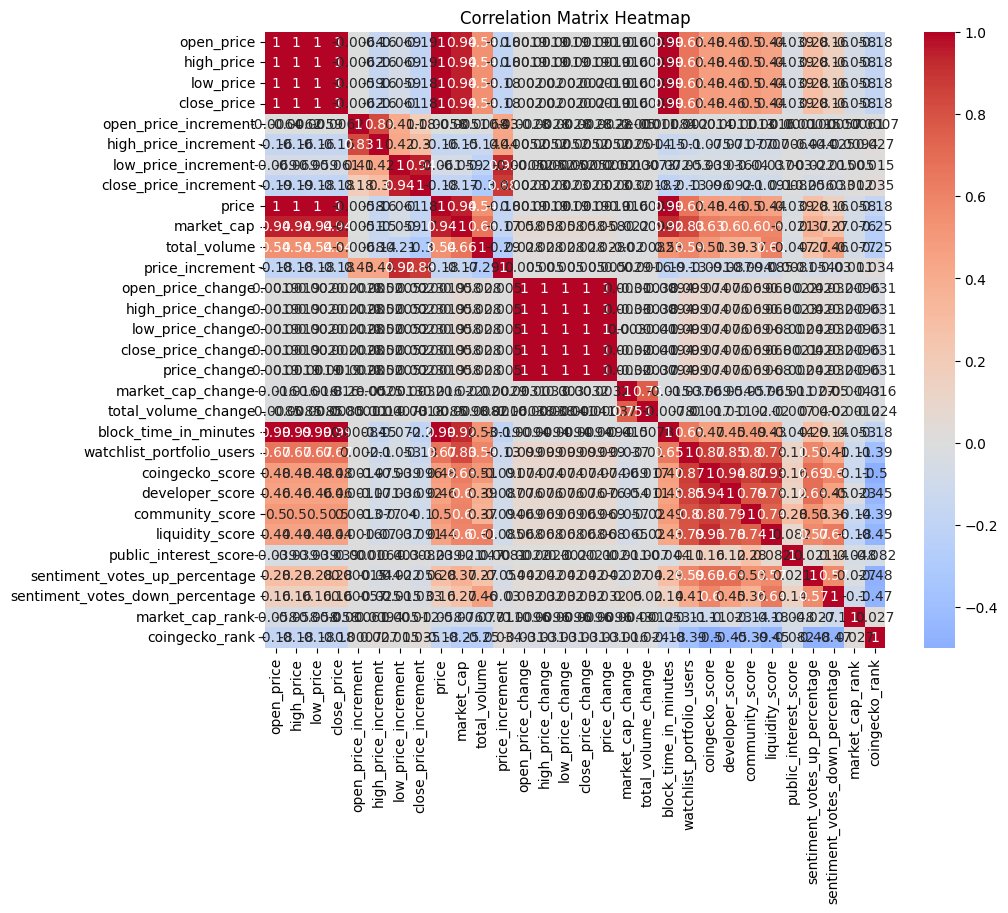

In [45]:
# Seleccionar solo las columnas numéricas para el cálculo de correlación
numeric_columns = merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()



___________________________________________________________________

### Experimentando otro poco

In [46]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   timestamp                        1240 non-null   datetime64[ns]
 1   open_price                       1240 non-null   float64       
 2   high_price                       1240 non-null   float64       
 3   low_price                        1240 non-null   float64       
 4   close_price                      1240 non-null   float64       
 5   crip_id                          1240 non-null   object        
 6   open_price_increment             1240 non-null   float64       
 7   high_price_increment             1240 non-null   float64       
 8   low_price_increment              1240 non-null   float64       
 9   close_price_increment            1240 non-null   float64       
 10  price                            1240 non-null   float64    

________________________________________________________________________________

### tickers_resume_df:

In [47]:
tickers_resume_df.head(10)

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,crip_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,0xb1c064c3f2908f741c9dea4afc5773238b53e6cc,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,4.365865e-08,2.279364e+07,yellow,0.610212,2023-08-22 01:04:20,2023-08-22 01:04:20,2023-08-22 01:32:18,False,True,https://app.uniswap.org/#/swap?inputcurrency=0...,https://v2.info.uniswap.org/token/0xb1c064c3f2...,warioxrpdumbledoreyugioh69inu,weth,uniswap v2 (ethereum),uniswap_v2,2.789000e-09,4.366500e-08,0.000073,0.064035,1.002416,1670.91
1,akt,usdt,1.453200e+00,7.264280e+05,green,0.309896,2023-08-24 17:24:55,2023-08-24 17:24:55,2023-08-24 17:24:55,False,False,https://www.kucoin.com/trade/akt-usdt,not founded token_info_url #404,akash-network,tether,kucoin,kucoin,5.573000e-05,8.809400e-04,1.450000,40.482389,639.937000,1054615.00
2,akt,usd,1.471800e+00,6.001172e+05,green,0.312542,2023-08-24 17:23:45,2023-08-24 17:23:45,2023-08-24 17:23:45,False,False,https://pro.kraken.com/app/trade/akt-usd,not founded token_info_url #404,akash-network,usd,kraken,kraken,5.646000e-05,8.925500e-04,1.470000,33.884656,535.637000,883253.00
3,akt,usdt,1.462120e+00,3.152540e+05,green,0.392221,2023-08-24 17:25:01,2023-08-24 17:25:01,2023-08-24 17:25:01,False,False,https://ascendex.com/en/cashtrade-spottrading/...,not founded token_info_url #404,akash-network,tether,ascendex (bitmax),bitmax,5.607000e-05,8.862700e-04,1.460000,17.676319,279.399000,460772.00
4,akt,usdt,1.455240e+00,2.198349e+05,green,0.346900,2023-08-24 17:25:53,2023-08-24 17:25:53,2023-08-24 17:25:53,False,False,https://gate.io/trade/akt_usdt,not founded token_info_url #404,akash-network,tether,gate.io,gate,5.581000e-05,8.821000e-04,1.450000,12.249217,193.616000,319303.00
5,akt,usdt,1.450700e+00,7.148510e+05,green,1.137220,2023-08-24 17:25:44,2023-08-24 17:25:44,2023-08-24 17:25:44,False,False,https://www.huobi.com/en-us/exchange/akt_usdt,not founded token_info_url #404,akash-network,tether,huobi,huobi,5.563000e-05,8.793400e-04,1.450000,39.890601,630.526000,1039835.00
6,akt,eth,8.810000e-04,4.549692e+03,green,1.576577,2023-08-24 17:25:53,2023-08-24 17:25:53,2023-08-24 17:25:53,False,False,https://gate.io/trade/akt_eth,not founded token_info_url #404,akash-network,ethereum,gate.io,gate,5.575000e-05,8.812000e-04,1.450000,0.253265,4.003198,6601.89
7,akt,eur,1.351300e+00,3.211060e+04,green,0.823590,2023-08-24 17:02:43,2023-08-24 17:02:43,2023-08-24 17:23:45,False,False,https://pro.kraken.com/app/trade/akt-eur,not founded token_info_url #404,akash-network,usd,kraken,kraken,5.610000e-05,8.868500e-04,1.460000,1.801484,28.477248,46958.00
8,akt,usd,1.459300e+00,5.329300e+04,green,1.693810,2023-08-24 17:20:12,2023-08-24 17:20:12,2023-08-24 17:23:30,False,False,https://crypto.com/exchange/trade/spot/akt_usd,not founded token_info_url #404,akash-network,usd,crypto.com exchange,crypto_com,5.598000e-05,8.849700e-04,1.460000,2.983547,47.162904,77770.00
9,akt,usdt,1.463300e+00,8.562287e+03,green,0.996723,2023-08-24 17:24:00,2023-08-24 17:24:00,2023-08-24 17:24:00,False,False,https://www.coinex.com/trading?currency=usdt&d...,not founded token_info_url #404,akash-network,tether,coinex,coinex,5.612000e-05,8.870600e-04,1.460000,0.476636,7.534554,12416.93


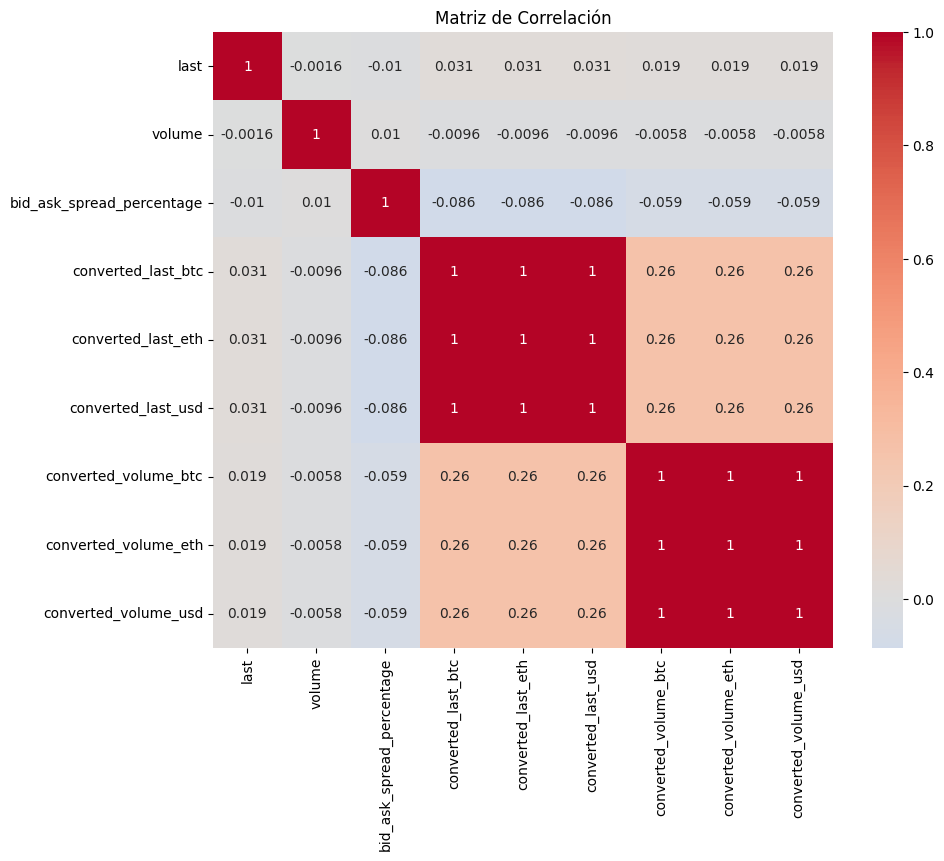

In [48]:
numeric_columns = tickers_resume_df.select_dtypes(include=['float64', 'int64','int32','float32'])  # Seleccionar solo columnas numéricas
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()


________________________________

### algunos experimentos para el merge, timestamp mas proximo

In [49]:
# Realizar el merge
merged_result = pd.merge(merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df, tickers_resume_df, on=["crip_id"])

In [50]:
# Imprimir el resultado
merged_result.head(5)

,timestamp_x,open_price,high_price,low_price,close_price,crip_id,open_price_increment,high_price_increment,low_price_increment,close_price_increment,price,market_cap,total_volume,price_increment,open_price_change,high_price_change,low_price_change,close_price_change,price_change,market_cap_change,total_volume_change,asset_platform_id,block_time_in_minutes,watchlist_portfolio_users,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,coingecko_rank,public_notice,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp_y,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,2023-07-26,0.59295,0.59366,0.59271,0.5932,akash-network,0.00439,0.00386,0.00415,0.0034,0.59366,128287320.0,1247840.9,0.01151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,51086,43.599,70.553,34.801,25.05,0.002,2023-08-24 17:09:27.252000+00:00,85.92,14.08,108.0,121.0,NaN,akt,usdt,1.45320,726427.951700,green,0.309896,2023-08-24 17:24:55,2023-08-24 17:24:55,2023-08-24 17:24:55,False,False,https://www.kucoin.com/trade/akt-usdt,not founded token_info_url #404,tether,kucoin,kucoin,0.000056,0.000881,1.45,40.482389,639.937,1054615.0
1,2023-07-26,0.59295,0.59366,0.59271,0.5932,akash-network,0.00439,0.00386,0.00415,0.0034,0.59366,128287320.0,1247840.9,0.01151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,51086,43.599,70.553,34.801,25.05,0.002,2023-08-24 17:09:27.252000+00:00,85.92,14.08,108.0,121.0,NaN,akt,usd,1.47180,600117.218548,green,0.312542,2023-08-24 17:23:45,2023-08-24 17:23:45,2023-08-24 17:23:45,False,False,https://pro.kraken.com/app/trade/akt-usd,not founded token_info_url #404,usd,kraken,kraken,0.000056,0.000893,1.47,33.884656,535.637,883253.0
2,2023-07-26,0.59295,0.59366,0.59271,0.5932,akash-network,0.00439,0.00386,0.00415,0.0034,0.59366,128287320.0,1247840.9,0.01151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,51086,43.599,70.553,34.801,25.05,0.002,2023-08-24 17:09:27.252000+00:00,85.92,14.08,108.0,121.0,NaN,akt,usdt,1.46212,315254.000000,green,0.392221,2023-08-24 17:25:01,2023-08-24 17:25:01,2023-08-24 17:25:01,False,False,https://ascendex.com/en/cashtrade-spottrading/...,not founded token_info_url #404,tether,ascendex (bitmax),bitmax,0.000056,0.000886,1.46,17.676319,279.399,460772.0
3,2023-07-26,0.59295,0.59366,0.59271,0.5932,akash-network,0.00439,0.00386,0.00415,0.0034,0.59366,128287320.0,1247840.9,0.01151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,51086,43.599,70.553,34.801,25.05,0.002,2023-08-24 17:09:27.252000+00:00,85.92,14.08,108.0,121.0,NaN,akt,usdt,1.45524,219834.875850,green,0.346900,2023-08-24 17:25:53,2023-08-24 17:25:53,2023-08-24 17:25:53,False,False,https://gate.io/trade/akt_usdt,not founded token_info_url #404,tether,gate.io,gate,0.000056,0.000882,1.45,12.249217,193.616,319303.0
4,2023-07-26,0.59295,0.59366,0.59271,0.5932,akash-network,0.00439,0.00386,0.00415,0.0034,0.59366,128287320.0,1247840.9,0.01151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,51086,43.599,70.553,34.801,25.05,0.002,2023-08-24 17:09:27.252000+00:00,85.92,14.08,108.0,121.0,NaN,akt,usdt,1.45070,714851.040160,green,1.137220,2023-08-24 17:25:44,2023-08-24 17:25:44,2023-08-24 17:25:44,False,False,https://www.huobi.com/en-us/exchange/akt_usdt,not founded token_info_url #404,tether,huobi,huobi,0.000056,0.000879,1.45,39.890601,630.526,1039835.0


In [51]:
merged_result.shape

(62376, 57)

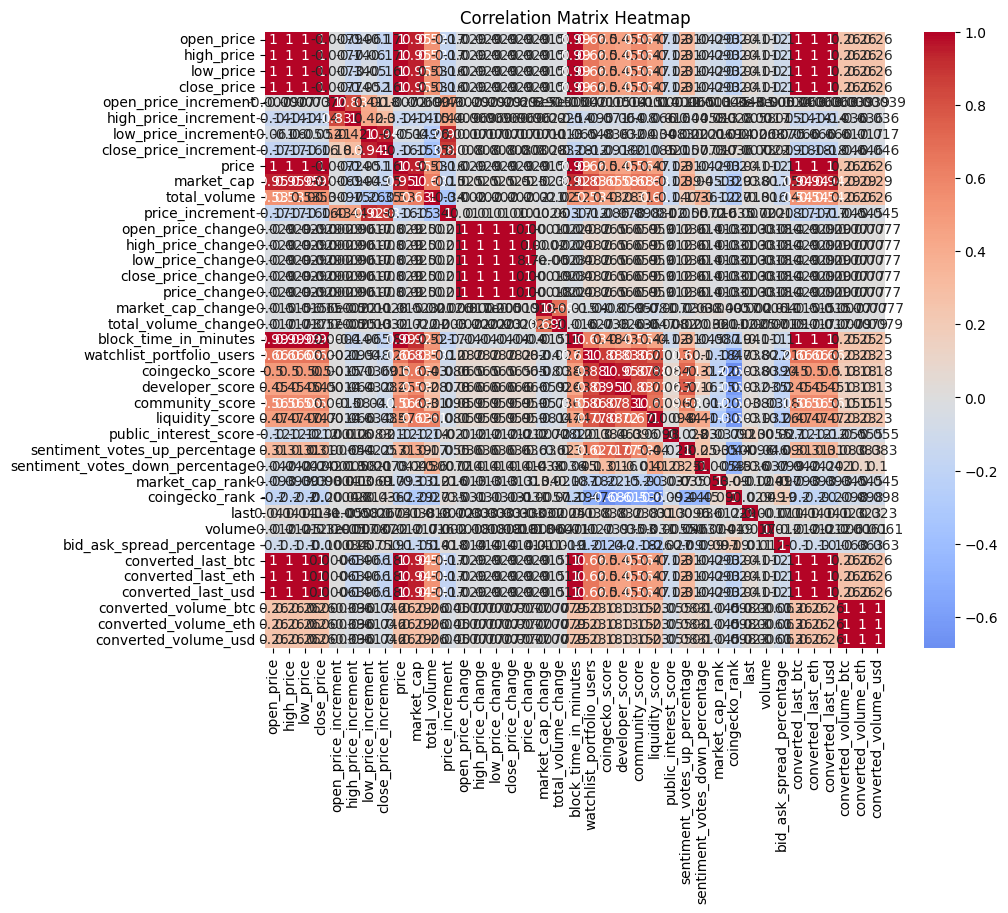

In [52]:
# Seleccionar solo las columnas numéricas para el cálculo de correlación
numeric_columns = merged_result.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [53]:
merged_result.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/merged_result.csv', mode='w', index=False)

________________________________________

### top_criptos_df:

In [54]:
top_criptos_df.head(15)

,crip_id,market_cap_percentage,total_market_cap,total_volume
0,btc,46.407202,4.194768e+07,1.770907e+06
1,eth,18.152694,6.632083e+08,2.799869e+07
2,bnb,3.063912,5.023442e+09,2.120748e+08
3,xrp,2.499910,2.117374e+12,8.938925e+10


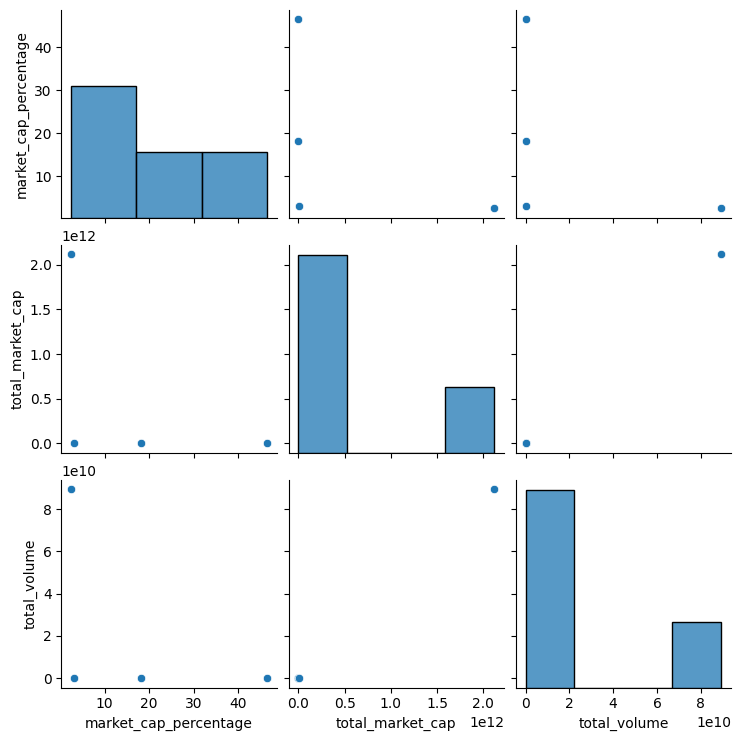

In [55]:
sns.pairplot(top_criptos_df)